# Lab 7. Análisis de Redes Sociales

## Miembros
- Fernanda Esquivel 21542
- Sofía Lam 21548

## Link al repositorio
El repositorio puede ser visualizado [acá](https://github.com/FerEsq/DS-Lab-07.git)

## Problema seleccionado
* Problema 1 (@traficogt)


# Carga de Datos

In [2]:
import json
import pandas as pd
import chardet

In [3]:
filePath = 'traficogt.txt'

#Detectar encoding
with open(filePath, 'rb') as file:
    raw_data = file.read()
    result = chardet.detect(raw_data)
    encoding = result['encoding']

tweets = []

#Abre el archivo con el encoding detectado
with open(filePath, 'r', encoding=encoding, errors='replace') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweets.append(tweet)
        except json.JSONDecodeError:
            #Saltarse las lineas que no se pueden decodificar
            print(f"Error decoding JSON for line: {line}")
            continue

#Convertir a DataFrame
df = pd.DataFrame(tweets)

#Confirmar que se cargaron los datos
print(df.head())

Error decoding JSON for line: {"id": 1711127305131631071, "id_str": "1711127305131631071", "url": "https://x.com/nquevedoa/status/1711127305131631071", "date": "2023-10-08 21:11:55+00:00", "user": {"id": 204996481, "id_str": "204996481", "url": "https://x.com/nquevedoa", "username": "nquevedoa", "displayname": "Nelque", "rawDescription": "", "created": "2010-10-19 23:02:23+00:00", "followersCount": 218, "friendsCount": 111, "statusesCount": 228617, "favouritesCount": 199488, "listedCount": 2, "mediaCount": 530, "location": "Guatemala", "profileImageUrl": "https://pbs.twimg.com/profile_images/1013567326216687617/f7kWGWnp_normal.jpg", "profileBannerUrl": "https://pbs.twimg.com/profile_banners/204996481/1530488114", "protected": null, "verified": false, "blue": false, "blueType": null, "descriptionLinks": [], "pinnedIds": [], "_type": "snscrape.modules.twitter.User"}, "lang": "es", "rawContent": "@mildred_gaitan @jczamora @traficogt @ChepeZamora @el_Periodico @mmendoza_GT @cmendeza @JLFon

# Limpieza y preprocesamiento

In [4]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
#Definir función para limpiar los tweets
def cleanTweet(text):
    #Convertir a minúsculas
    text = text.lower()
    #Eliminar URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    #Eliminar menciones
    text = re.sub(r'@\w+', '', text)
    #Eliminar hashtags
    text = re.sub(r'#\w+', '', text)
    #Eliminar números
    text = re.sub(r'\d+', '', text)
    #Eliminar signos de puntuación
    text = re.sub(r'[^\w\s]', '', text)
    #Tokenizar y eliminar stopwords
    tokens = word_tokenize(text)
    cleaned_text = [word for word in tokens if word not in stopwords.words('spanish')]
    return ' '.join(cleaned_text)

In [6]:
#Aplcar la limpieza al campo 'rawContent'
df['cleaned_content'] = df['rawContent'].apply(cleanTweet)

In [7]:
#Verificar la data limpia
print(df[['rawContent', 'cleaned_content']].head())

                                          rawContent  \
0  Es comprensible la resolución... El ruso sabe ...   
1  La corrupción de la @CC_Guatemala\nes descarad...   
2  @PNCdeGuatemala @mingobguate @FJimenezmingob @...   
3  @amilcarmontejo @AztecaNoticiaGT @BancadaSemil...   
4  @soy_502 @AztecaNoticiaGT @CONAPgt @DenunciaEM...   

                                     cleaned_content  
0  comprensible resolución ruso sabe engrasar maq...  
1  corrupción descarada falsificación documentos ...  
2                                                     
3                                                     
4  urgente zona deterioro tala inmoderada tráfico...  


# Análisis Exploratorio

In [9]:
#Número total de tweets
numTweets = len(df)
print(f"Número total de tweets: {numTweets}")

Número total de tweets: 5604


In [10]:
#Número de usuarios únicos
uniqueUsers = df['user'].apply(lambda x: x['username']).nunique()
print(f"Número total de usuarios únicos: {uniqueUsers}")

Número total de usuarios únicos: 2071


In [12]:
#Menciones y respuestas

#Extraer las menciones de la clave 'mentionedUsers'
df['mentions'] = df['mentionedUsers'].apply(lambda x: [user['username'] for user in x] if x else [])

#Extraer las respuestas
df['replies'] = df['inReplyToTweetId'].notnull()

#Calculo del número total de menciones y respuestas
numMentions = df['mentions'].apply(len).sum()
numReplies = df['replies'].sum()

print(f"Número total de menciones: {numMentions}")
print(f"Número total de respuestas: {numReplies}")


Número total de menciones: 10929
Número total de respuestas: 3991


In [14]:
from collections import Counter

#Extraer hashtags
hashtags = df['hashtags'].explode().dropna()
topHashtags = Counter(hashtags).most_common(10)

print("Hashtags más frecuentes:")
for tag, count in topHashtags:
    print(f"{tag}: {count}")

Hashtags más frecuentes:
AhoraLH: 18
AHORA: 18
Guatemala: 16
RenuncienGolpistas: 13
URGENTE: 10
guatemala: 9
ParoNacionalIndefinido: 9
Ahora: 8
LaHoraDeActualizarnos: 8
GuateResiste: 8


In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

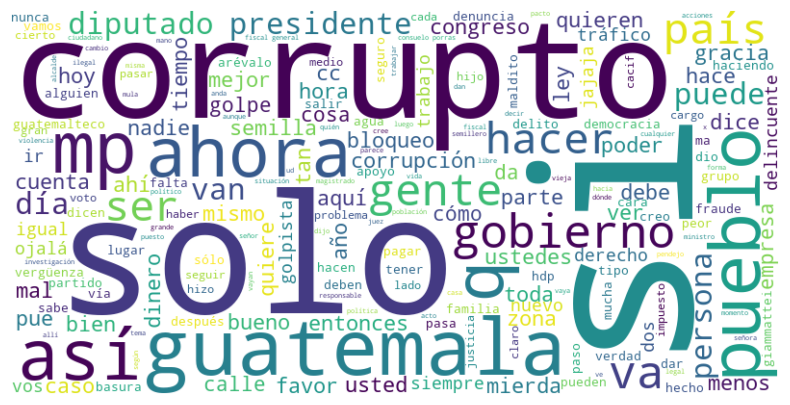

In [16]:
#Nube de palabras
allText = ' '.join(df['cleaned_content'].dropna())

#Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(allText)

#Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Preguntas interesantes

### 1. ¿Cuál es el impacto de las menciones y respuestas en la interacción entre usuarios?

In [19]:
import networkx as nx

In [24]:
#Crear un grafo dirigido
G = nx.DiGraph()

#Agregar aristas para menciones y respuestas
for index, row in df.iterrows():
    user = row['user']['username'].lower()
    
    #Agregar menciones como aristas
    for mention in row['mentions']:
        mentionUser = mention.lower()
        G.add_edge(user, mentionUser, interaction='mention')
    
    #Agregar respuesta como arista
    if row['replies']:
        repliedUser = row['inReplyToUser']['username'].lower() if row['inReplyToUser'] else None
        if repliedUser:
            G.add_edge(user, repliedUser, interaction='reply')

#Resumen de la red
print(f"Resumen de la red:")
print(f"Número de nodos (usuarios): {G.number_of_nodes()}")
print(f"Número de aristas (interacciones): {G.number_of_edges()}")

Resumen de la red:
Número de nodos (usuarios): 2720
Número de aristas (interacciones): 7383


In [21]:
#Usuarios más mencionados (mayor grado de entrada)
most_mentioned = sorted(G.in_degree, key=lambda x: x[1], reverse=True)[:10]
print("Usuarios más mencionados:")
for user, mentions in most_mentioned:
    print(f"{user}: {mentions} menciones")

Usuarios más mencionados:
traficogt: 1892 menciones
barevalodeleon: 327 menciones
drgiammattei: 132 menciones
prensacomunitar: 121 menciones
mmendoza_gt: 109 menciones
mpguatemala: 102 menciones
lahoragt: 91 menciones
amilcarmontejo: 90 menciones
cc_guatemala: 79 menciones
muniguate: 65 menciones


Tras analizar las menciones y respuestas, encontramos que las cuentas dedicada al tráfico del país (@traficogt) y la del presidente (@barevalodeleon), son los más mencionados y generan una gran cantidad de interacciones. Esto sugiere que estos usuarios actúan como centros de información clave en el tráfico de la ciudad.

### 2. ¿Qué áreas o temas generan más tráfico de menciones?

In [25]:
from collections import Counter

In [26]:
#Extraer hashtags
hashtags = df['hashtags'].explode().dropna()
topHashtags = Counter(hashtags).most_common(10)

print("Hashtags más frecuentes:")
for tag, count in topHashtags:
    print(f"{tag}: {count} veces")

Hashtags más frecuentes:
AhoraLH: 18 veces
AHORA: 18 veces
Guatemala: 16 veces
RenuncienGolpistas: 13 veces
URGENTE: 10 veces
guatemala: 9 veces
ParoNacionalIndefinido: 9 veces
Ahora: 8 veces
LaHoraDeActualizarnos: 8 veces
GuateResiste: 8 veces


Los hashtags como #AhoraLH, #Guatemala y #RenuncienGolpistas aparecen frecuentemente, lo que indica que gran parte de los tweets suelen ser informativos o para expresar inconformidad con el tráfico del país.

### 3. ¿Hay algún patrón temporal en los tweets sobre el tráfico, como ciertos días u horas donde ocurren más atascos?

In [27]:
#Convertir la columna de fechas a tipo datetime si no está ya convertida
df['date'] = pd.to_datetime(df['date'])

In [28]:
#Agregar una columna de hora
df['hour'] = df['date'].dt.hour

In [29]:
#Contar la cantidad de tweets por hora del día
tweetsPerHour = df.groupby('hour').size()

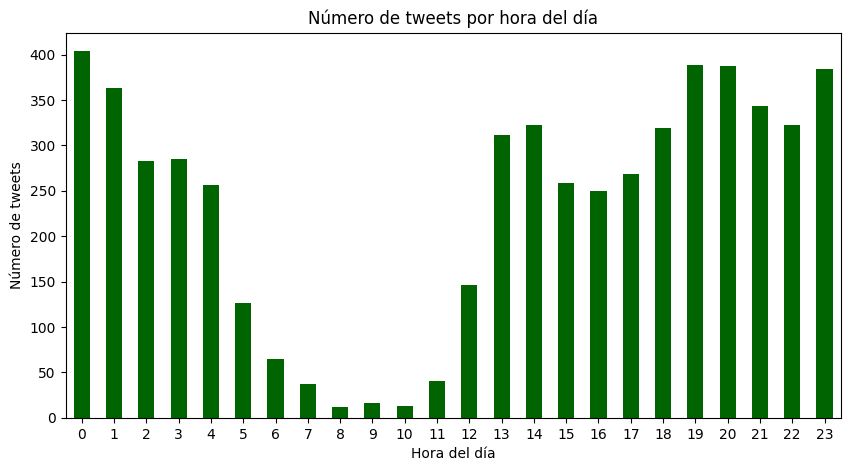

In [31]:
#Visualizar los resultados
import matplotlib.pyplot as plt

tweetsPerHour.plot(kind='bar', figsize=(10, 5), color='darkgreen')
plt.title('Número de tweets por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de tweets')
plt.xticks(rotation=0)
plt.show()

Los picos de tweets en las primeras horas de la madrugada y nuevamente en la tarde (particularmente entre las 5 p.m. y las 7 p.m.) sugieren que los problemas de tráfico están relacionados con las horas en las que las personas se desplazan para ir o regresar del trabajo. La alta actividad en la madrugada podría estar relacionada con accidentes o situaciones nocturnas inesperadas.

# Análisis de la topología de la red

## Construcción y visualización del grafo

In [35]:
import networkx as nx
import matplotlib.pyplot as plt

In [36]:
#Crear un grafo dirigido
G = nx.DiGraph()

#Agregar aristas para menciones y respuestas
for index, row in df.iterrows():
    user = row['user']['username'].lower()
    
    #Agregar menciones como aristas
    for mention in row['mentions']:
        mentionUser = mention.lower()
        G.add_edge(user, mentionUser, interaction='mention')
    
    #Agregar respuesta como arista
    if row['replies']:
        repliedUser = row['inReplyToUser']['username'].lower() if row['inReplyToUser'] else None
        if repliedUser:
            G.add_edge(user, repliedUser, interaction='reply')

#Obtener los nodos más conectados
degreeDict = dict(G.degree(G.nodes))
sortedDegree = sorted(degreeDict.items(), key=lambda x: x[1], reverse=True)

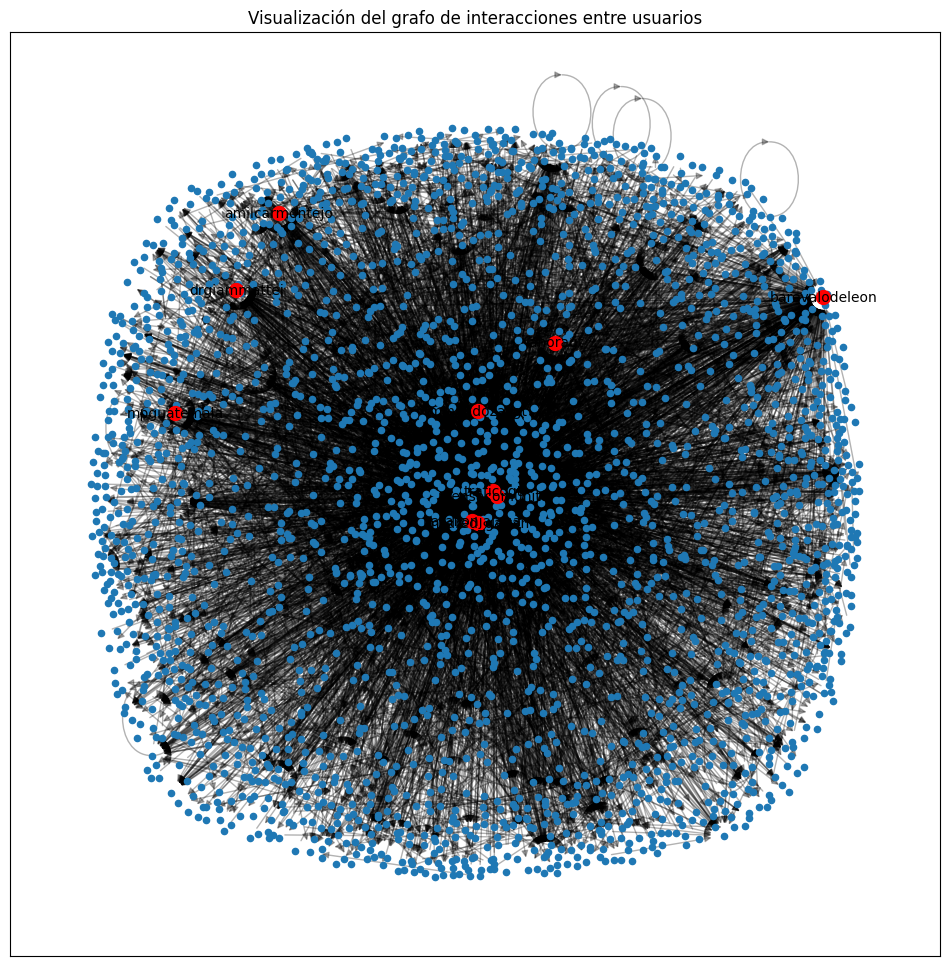

In [37]:
#Visualización del grafo
plt.figure(figsize=(12, 12))

#Posiciones para los nodos
pos = nx.spring_layout(G, k=0.15, iterations=20)

#Dibujar los nodos
nx.draw_networkx_nodes(G, pos, node_size=20)

#Dibujar las aristas
nx.draw_networkx_edges(G, pos, alpha=0.3)

#Resaltar los nodos más conectados
most_connected_nodes = [node for node, degree in sortedDegree[:10]]
nx.draw_networkx_nodes(G, pos, nodelist=most_connected_nodes, node_color='r', node_size=100)

#Mostrar los nodos más conectados
nx.draw_networkx_labels(G, pos, labels={node: node for node in most_connected_nodes}, font_size=10)

plt.title("Visualización del grafo de interacciones entre usuarios")
plt.show()

## Cálculo de métricas de red clave

In [38]:
#Calcular la densidad de la red
networkDensity = nx.density(G)
print(f"Densidad de la red: {networkDensity}")

Densidad de la red: 0.0009982854855807716


In [41]:
#Obtener las componentes fuertemente conectadas del grafo
largestStronglyConnectedComponent = max(nx.strongly_connected_components(G), key=len)

#Crear un subgrafo a partir de la componente más grande
subgraph = G.subgraph(largestStronglyConnectedComponent)

#Calcular la densidad de la componente más grande
networkDensity = nx.density(subgraph)
print(f"Densidad de la componente más grande: {networkDensity}")

#Calcular el diámetro de la componente fuertemente conectada más grande
networkDiameter = nx.diameter(subgraph)
print(f"Diámetro de la componente más grande: {networkDiameter}")

#Calcular el coeficiente de agrupamiento de la componente
clustering_coefficient = nx.average_clustering(subgraph)
print(f"Coeficiente de agrupamiento de la componente más grande: {clustering_coefficient}")

Densidad de la componente más grande: 0.30357142857142855
Diámetro de la componente más grande: 4
Coeficiente de agrupamiento de la componente más grande: 0.41755952380952377


In [42]:
#Calcular el coeficiente de agrupamiento medio
clustering_coefficient = nx.average_clustering(G)
print(f"Coeficiente de agrupamiento promedio: {clustering_coefficient}")

Coeficiente de agrupamiento promedio: 0.11957980008403528
